# Working with Text Data and Naive Bayes in Scikit-Learn (50 points) 

# Representing text as data

In [1]:
#1.Give a simple dataset
from sklearn.feature_extraction.text import CountVectorizer
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [2]:
#2.Learn the 'vocabulary' of the training data use CountVectorizer() to "convert text into a matrix of token counts":
vect = CountVectorizer()
vect.fit(simple_train)
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [3]:
#3.transform training data into a 'document-term matrix' (which is a sparse matrix)
#use “transform()”
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [4]:
#4. print the sparse matrix
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [5]:
#5. Convert sparse matrix to a dense matrix use "“toarray()"
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [6]:
#6.examine the vocabulary and document-term matrix together
#use pandas DataFrame and columns by using “get_feature_names()”

import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [7]:
#7.transform testing data into a document-term matrix (using existing vocabulary)
#use the test data as:
#simple_test = ["please don't call me"]
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [8]:
#8. examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


# Reading SMS data

In [9]:
#9. read tab-separated file “sms.tsv”; give the names of columns as ['label', 'message']; and use head()
#to view part of the data.
col_names = ['label', 'message']
dataSMS = pd.read_table('sms.tsv',sep='\t', header=None, names=col_names) 
print(dataSMS.shape)

(5572, 2)


In [10]:
dataSMS.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
dataSMS.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
#10. convert label to a numeric variable
dataSMS['label'] = dataSMS.label.map({'ham':0,'spam':1})
dataSMS.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#11. define X and y
X = dataSMS.message
y = dataSMS.label

In [14]:
#12. split into training and testing sets by train_test_split(); and print the shape of training set and test
#set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [15]:
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)


# Vectorizing SMS data


In [16]:
#13. instantiate the vectorizer by CountVectorizer()
vect = CountVectorizer()

In [17]:
#14. learn training data vocabulary, then create document-term matrix “X_train_dtm”
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [18]:
#15. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm =vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

# Building a Naive Bayes model by using Multinomial Naïve Bayes

In [19]:
#16. train a Naive Bayes model using the matrix “X_train_dtm”
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
#17. calculate accuracy of predictions
y_predict = nb.predict(X_test_dtm)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict))

0.9885139985642498


In [21]:
#18. give the confusion matrix
print(metrics.confusion_matrix(y_test, y_predict))

[[1203    5]
 [  11  174]]


In [22]:
#19. print message text for the false positives
X_test[y_test < y_predict]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [23]:
#20. print message text for the false negatives
X_test[y_test > y_predict]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

# Linear Regression (50 points) 

# The Data

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
y = boston.target
boston_data = pd.DataFrame(boston.data)

In [3]:
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#1.First, use boston.corr() to show what features are correlated with each other
correlation = boston_data.corr()
correlation

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [5]:
#2.The columns don't have any labels. This happens with some datasets. According to the column
#values shown in https://www.kaggle.com/c/boston-housing, you need to label the columns. Note:
#only label 13 columns (the website has 14 labels for the columns), remove the last one of 'medv'.
#And use boston.corr() again
boston_data.columns = boston.feature_names
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
correlation = boston_data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


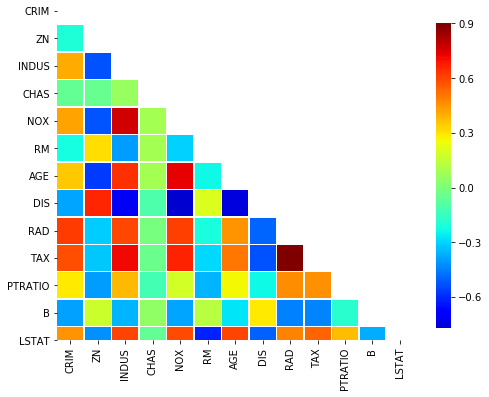

In [8]:
#3.Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a
#plot. Please plot correlations by color according to the following figure and giving the labels of x and
#y:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (8, 8))

cmap = sns.diverging_palette(10, 255, sep = 90)

sns.heatmap(correlation, mask = mask, cmap = 'jet', vmax = .9, center = 0, square = True, linewidths = .5, 
            cbar_kws = {"shrink": .7})

# Given this output, respond to the following questions:

#4. In the above plot, what features are highly correlated? Which features are highly uncorrelated? Features that are highly correlated are

In [10]:
The features TAX and RAD are highly correlated with correlation value of 0.9

#Features that are highly uncorrelated

In [ ]:
        The features highly uncorrelated are as follows:-
        
        DIS and NOX with correlation value of 0.76
        DIS and AGE with correlation value of 0.74
        DIS and INDUS with correlation value of 0.70

# Building the Linear Regression Model


#5. First, please split the data into two datasets as “training” dataset and “test” dataset by train_test_split(). According to the four steps taught in the classes, please train the model by linear regression. 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X = boston.data
y = boston.target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predict and Score Model
#6. Then, please predict new values using the test set.

In [17]:
prediction = model.predict(X_test)
prediction

array([32.37816533, 27.95684437, 18.07213891, 21.63166556, 18.93029508,
       19.96277202, 32.2834674 , 18.06715668, 24.72989076, 26.85359369,
       27.23326816, 28.57021239, 21.18778302, 26.94393815, 23.37892579,
       20.89176865, 17.11746934, 37.73997945, 30.51980066,  8.44489436,
       20.86557977, 16.21989418, 25.13605925, 24.77658813, 31.40497629,
       11.02741407, 13.82097563, 16.80208261, 35.94637198, 14.7155729 ,
       21.23939821, 14.15079469, 42.72492585, 17.83887162, 21.84610225,
       20.40178099, 17.50287927, 27.00093206,  9.80760408, 20.00288662,
       24.27066782, 21.06719021, 29.47089776, 16.48482565, 19.38852695,
       14.54778282, 39.39838319, 18.09810655, 26.22164983, 20.60676525,
       25.09994066, 24.48366723, 25.02297948, 26.84986898,  5.01517985,
       24.12809513, 10.72843392, 26.83178157, 16.8023533 , 35.48142073,
       19.50937911, 27.43260347, 16.58016763, 19.151488  , 10.9990262 ,
       32.05016535, 36.32672849, 21.8596379 , 24.8158357 , 25.32

# Please give the coefficient for your model

#7. The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. What does a positive coefficient and a negative coefficient indicate respectively?

In [18]:
coeff = model.coef_
coeff

array([-1.14428903e-01,  5.71299780e-02,  3.83002824e-02,  2.42854641e+00,
       -2.12326236e+01,  2.87723416e+00,  6.91118094e-03, -1.47158266e+00,
        3.05784197e-01, -1.06750361e-02, -9.96138270e-01,  6.27746234e-03,
       -5.57414427e-01])

In [20]:
A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.

A negative coefficient indicates that as the independent variable increases, the mean of the dependent variable tends to decrease.

#8. Finally, to gain an understanding of how your model is performing, please score the model against three metrics: R squared, mean squared error, and mean absolute error. Write the lines of code to get your output; and answer the questions

In [21]:
from sklearn import metrics
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Squared:',r_squared)
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

R Squared: 0.7354599231042712
MSE: 21.897765396049422
MAE: 3.5748681261275412


#a) Google R Squared, Mean Squared Error, and Mean Absolute Error. What do these metrics mean? What are the numbers telling you?


In [ ]:
R Squared represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

Mean Squared Error measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

Mean Absolute Error represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

Since, the R Squared value is o.73 which is quite less it tells that the model is not a great linear model. To have a better model the R Sqaured value should be close to 1.

In [22]:
model.score(X, y)

0.7354599231042711

#b) What do you think could improve the model? Try the possible improved model in coding lines as a bonus.

#THREE POSSIBLE ANSWERS ARE MENTIONED TO IMPROVE THE MODEL:-

Text(0.5, 1, 'Prices vs Predicted prices: True price vs Predicted price')

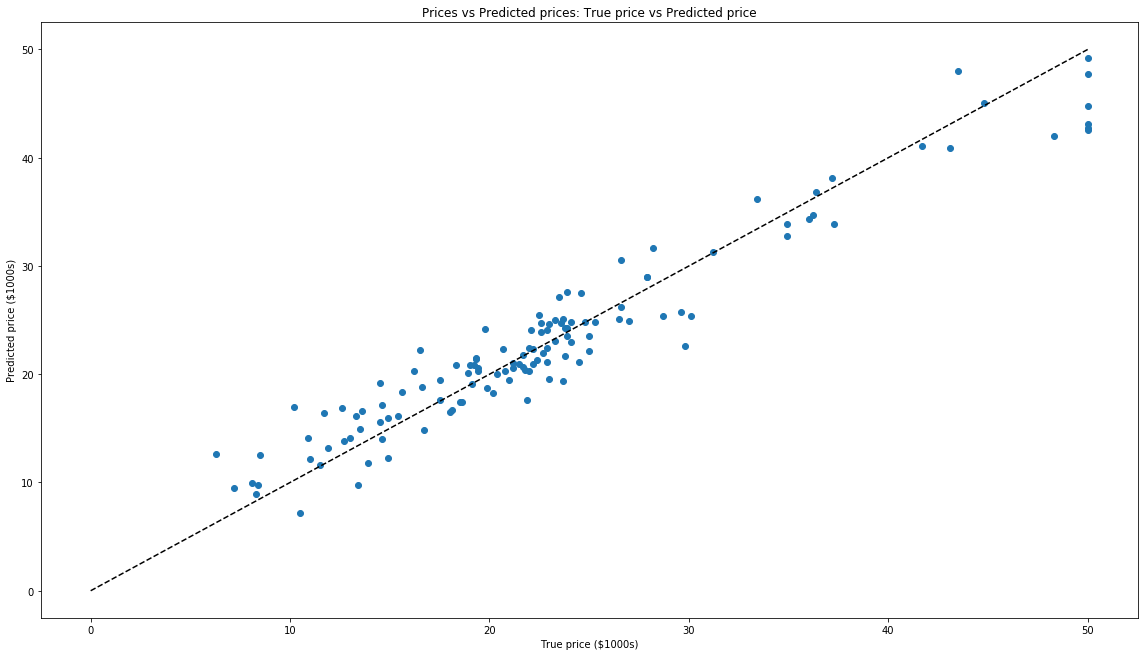

In [23]:
#ANSWER 1:-Improving the model using Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
plt.figure(figsize=(16, 9))
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

predicted = GB.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices: True price vs Predicted price")

In [24]:
GB.score(X_test,y_test)

0.9233546104515313

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
y_test_predict = GB.predict(X_test)
print('R-Squared :', r2_score(y_test, y_test_predict))

MAE: 2.140098508466407
MSE: 7.592375293848882
R-Squared : 0.9233546104515314


ANSWER 2:-
Feature Engineering; collinearity    
The model can be improved by normalising the data that is shift it to have a mean of zero, and a spread of 1 standard deviation

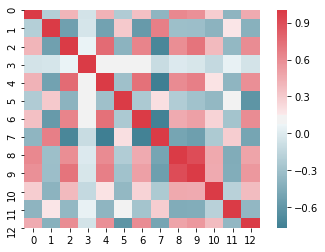

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
boston_data = pd.DataFrame(boston.data)
boston_data.head()
correlation = boston_data.corr()
correlation

sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

ANSWER 3:- Regularisation of the features to reduce possible overfitting

In [28]:
from sklearn.linear_model import RidgeCV
lr = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True)
print(lr)

RidgeCV(alphas=array([70. , 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71. ,
       71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72. , 72.1,
       72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73. , 73.1, 73.2,
       73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74. , 74.1, 74.2, 74.3,
       74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75. , 75.1, 75.2, 75.3, 75.4,
       75.5, 75.6, 75.7, 75.8, 75.9, 76. , 76.1, 76.2, 76.3, 76.4, 76.5,
       76.6,...
       94.2, 94.3, 94.4, 94.5, 94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2,
       95.3, 95.4, 95.5, 95.6, 95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3,
       96.4, 96.5, 96.6, 96.7, 96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4,
       97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5,
       98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6,
       99.7, 99.8, 99.9]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)
